<a href="https://colab.research.google.com/github/greysard/analisis-data-youtube-indonesia/blob/main/Indonesia_Trending_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/trending.csv")

Merge JSON

In [92]:
with open("/content/sample_data/category.json") as f:
    data = json.load(f)

In [ ]:
print(json.dumps(data, indent=4))

In [94]:
categories = {}
for item in data["items"]:
    categories[int(item["id"])] = item["snippet"]["title"]

# Ubah ke DataFrame
df_category = pd.DataFrame(list(categories.items()), columns=["category_id", "category_name"])

In [95]:
df = df.merge(df_category, on="category_id", how="left")

In [ ]:
df.head()

In [ ]:
# Mengecek Missing Values
print(df.isnull().sum())

Cleaning Data

In [98]:
# Menghapus Kolom Tidak Relevan
df = df.drop(columns=["thumbnail_url","thumbnail_width","thumbnail_height", "allowed_region","blocked_region","dislike"],
             errors="ignore")

In [99]:
# Mengubah NaN pada kolom
df["description"] = df["description"].fillna("No Description")
df["tags"] = df["tags"].fillna("No Tags")

In [100]:
# Hapus baris yang memiliki kolom NaN
df = df.dropna(subset=["view","like","comment"])

In [ ]:
df.info()

In [102]:
# Ubah ke datetime
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["trending_time"] = pd.to_datetime(df["trending_time"], errors="coerce")

In [ ]:
# Tambah kolom year-month untuk analisis tren
df["year_month"] = df["trending_time"].dt.to_period("M")

In [ ]:
df.info()

Visualisasi

/tmp/ipython-input-937921592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")


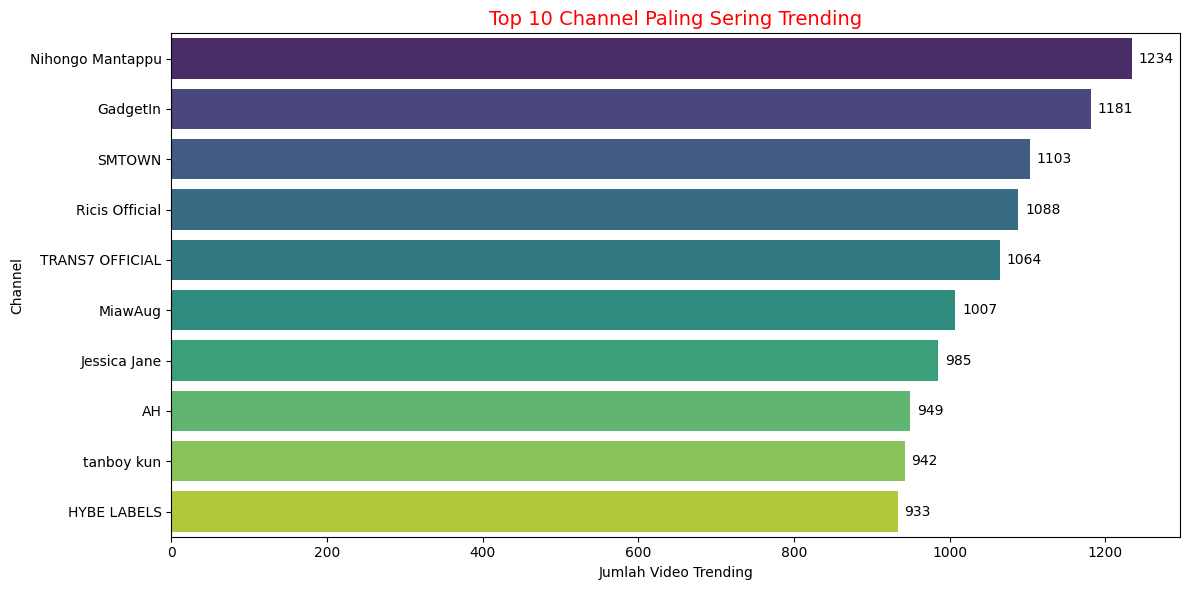

In [105]:
# TOP 10 Channel Paling Sering Trending
top_channels = df["channel_name"].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title("Top 10 Channel Paling Sering Trending", fontsize=14, color="red")
plt.xlabel("Jumlah Video Trending")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

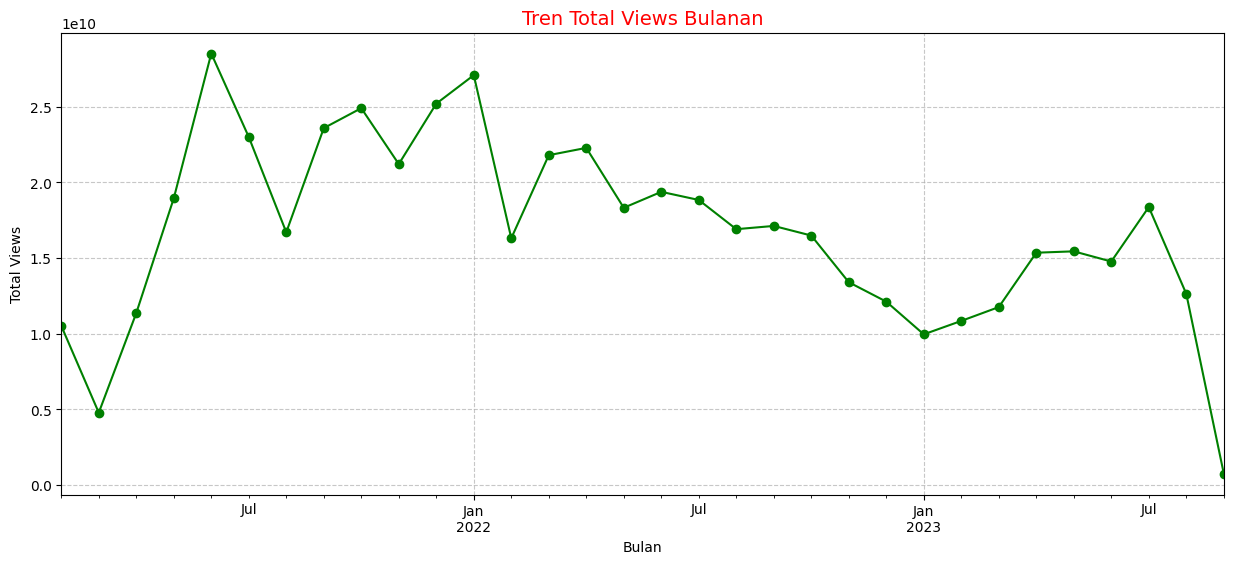

In [113]:
# Tren Views Bulanan
monthly_views = df.groupby("year_month")["view"].sum()

plt.figure(figsize=(15,6))
monthly_views.plot(marker="o", linestyle="-", color="green")
plt.title("Tren Total Views Bulanan", fontsize=14, color="red")
plt.xlabel("Bulan")
plt.ylabel("Total Views")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

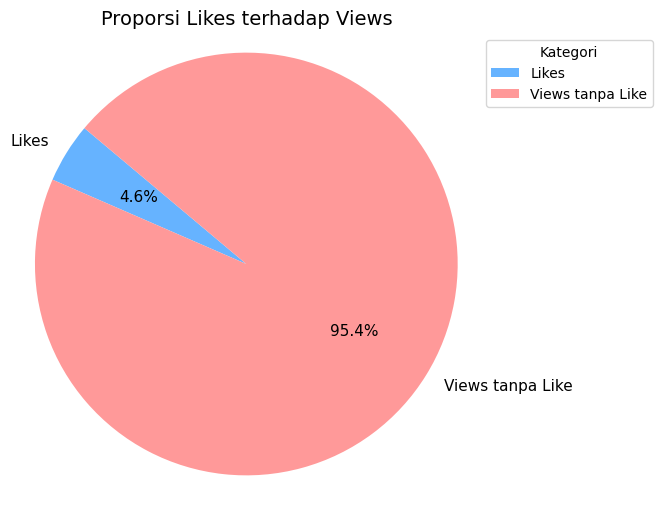

In [107]:
# Proporsi Likes terhadap Views
# Hitung total views dan likes
total_views = df["view"].sum()
total_likes = df["like"].sum()
others = total_views - total_likes  # views tanpa like

# Data untuk pie chart
sizes = [total_likes, others]
labels = ["Likes", "Views tanpa Like"]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(6,6))
wedges, text, autotexts=plt.pie(sizes, labels=labels, colors=colors, autopct="%.1f%%", startangle=140, textprops={"fontsize": 11})
plt.legend(wedges, labels,
          title="Kategori",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis("equal")
plt.title("Proporsi Likes terhadap Views", fontsize=14)
plt.show()

/tmp/ipython-input-1201507405.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette="mako")
/tmp/ipython-input-1201507405.py:16: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1201507405.py:16: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


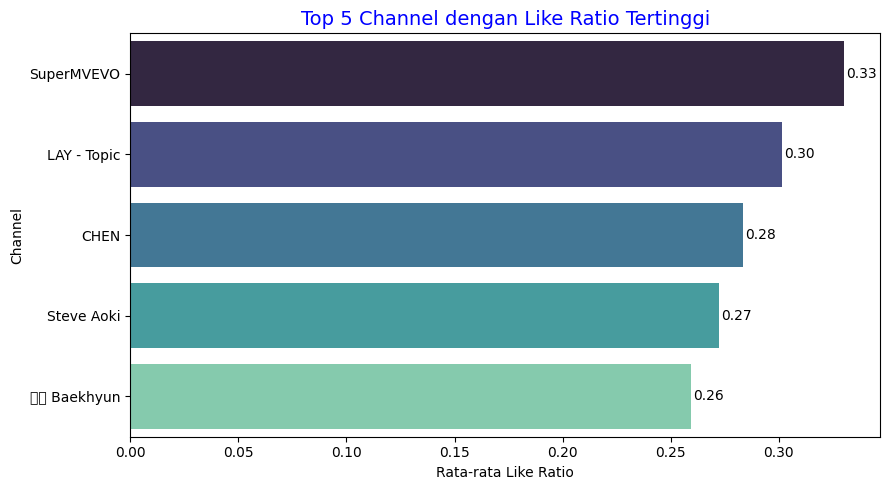

In [108]:
# TOP 5 Channel dengan Like Ratio Tertinggi
df["like_ratio"] = df["like"] / df["view"]

top_like_ratio = (df.groupby("channel_name")["like_ratio"]
                    .mean()
                    .sort_values(ascending=False)
                    .head(5))

plt.figure(figsize=(9,5))
ax = sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette="mako")
for i, v in enumerate(top_like_ratio.values):
    ax.text(v + 0.001, i, f'{v:.2f}', color='black', va='center')
plt.title("Top 5 Channel dengan Like Ratio Tertinggi", fontsize=14, color="blue")
plt.xlabel("Rata-rata Like Ratio")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


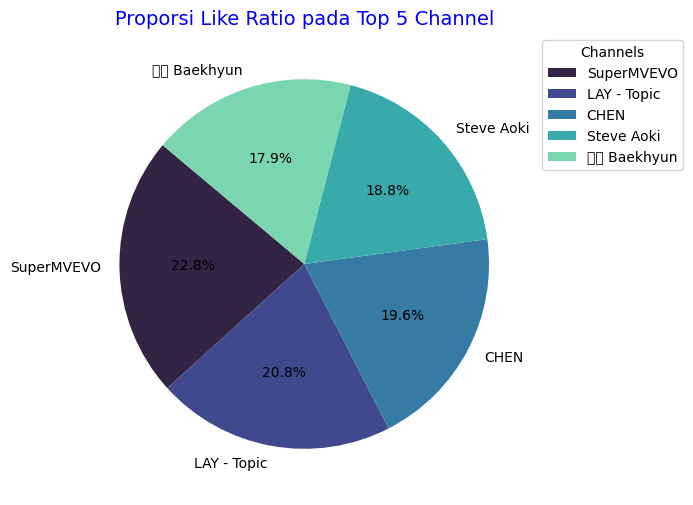

In [109]:
# Proporsi Like Ratio dengan TOP 5 Channel
df["like_ratio"] = df["like"] / df["view"]

top_like_ratio = (
    df.groupby("channel_name")["like_ratio"]
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

plt.figure(figsize=(7,6))
wedges, texts, autotexts=plt.pie(
    top_like_ratio.values,
    labels=top_like_ratio.index,
    autopct="%.1f%%",
    startangle=140,
    colors=sns.color_palette("mako", len(top_like_ratio))
)

plt.legend(wedges, top_like_ratio.index,
          title="Channels",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Proporsi Like Ratio pada Top 5 Channel", fontsize=14, color="blue")
plt.show()


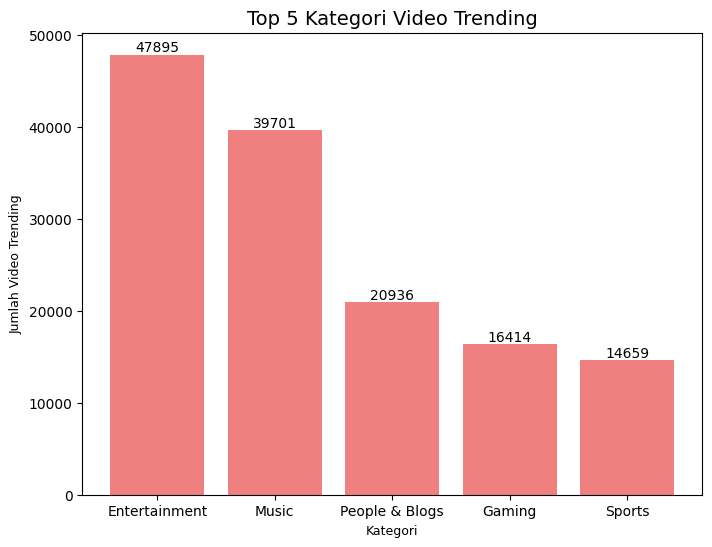

In [110]:
#TOP 5 Kategori Video Trending
category_counts = df["category_name"].value_counts().head(5)

plt.figure(figsize=(8,6))
bars = plt.bar(category_counts.index, category_counts.values, color="lightcoral")
plt.bar_label(bars)
plt.title("Top 5 Kategori Video Trending", fontsize=14)
plt.xlabel("Kategori", fontsize=9)
plt.ylabel("Jumlah Video Trending", fontsize=9)
plt.xticks(rotation=False)
plt.show()

/tmp/ipython-input-1380590881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videos_per_year.index, y=videos_per_year.values, palette="viridis")


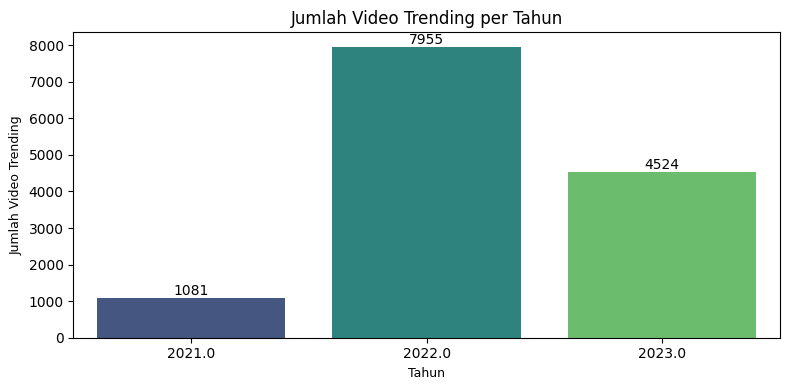

In [111]:
# Jumlah Video Trending Per Tahun
df["year"] = df["trending_time"].dt.year
videos_per_year = df.groupby("year")["video_id"].nunique().apply(lambda x: int(x))

plt.figure(figsize=(8,4))
sns.barplot(x=videos_per_year.index, y=videos_per_year.values, palette="viridis")
for i, v in enumerate(videos_per_year.values):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Jumlah Video Trending per Tahun", fontsize=12)
plt.xlabel("Tahun", fontsize=9)
plt.ylabel("Jumlah Video Trending", fontsize=9)
plt.tight_layout()
plt.show()

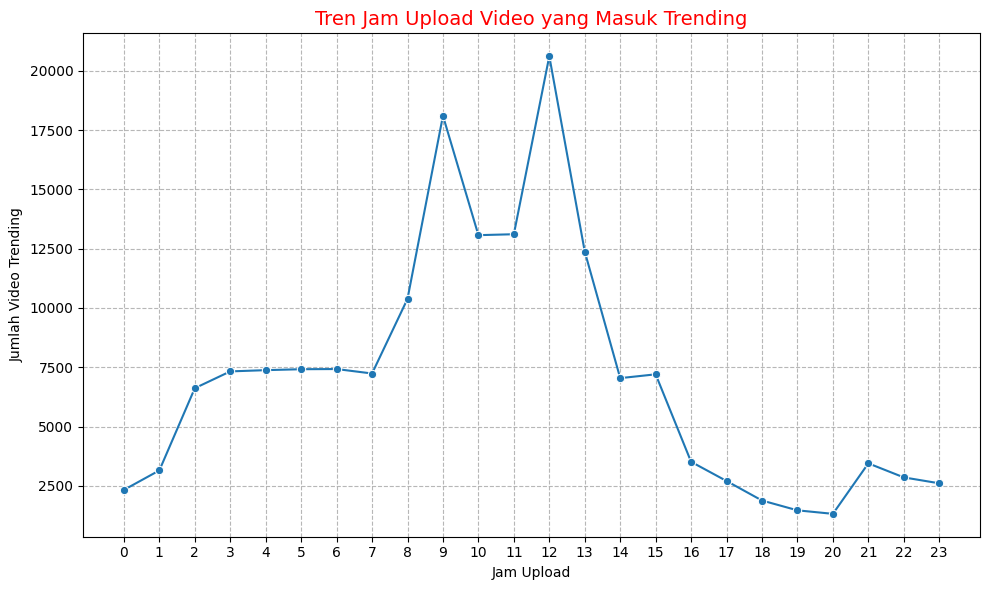

In [112]:
# Tren Jam Upload Video yang Masuk Trending
df["publish_hour"] = df["publish_time"].dt.hour
upload_hours = df["publish_hour"].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=upload_hours.index, y=upload_hours.values, marker="o")
plt.title("Tren Jam Upload Video yang Masuk Trending", fontsize=14, color="red")
plt.xlabel("Jam Upload")
plt.ylabel("Jumlah Video Trending")
plt.grid(True, linestyle="--", alpha=0.9)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()